In [1]:
import h2o

In [2]:
h2o.init(max_mem_size = 2)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.7.0_80"; Java(TM) SE Runtime Environment (build 1.7.0_80-b15); Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from /usr/local/lib/python2.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3rsYDP
  JVM stdout: /tmp/tmp3rsYDP/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3rsYDP/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.10.3.4
H2O cluster version age:,7 months and 24 days !!!
H2O cluster name:,H2O_from_python_unknownUser_0s0jkt
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [3]:
h2o.remove_all()

In [4]:
help(h2o)

Help on package h2o:

NAME
    h2o - :mod:`h2o` -- module for using H2O services.

FILE
    /usr/local/lib/python2.7/dist-packages/h2o/__init__.py

DESCRIPTION
    (please add description).

PACKAGE CONTENTS
    assembly
    astfun
    backend (package)
    cross_validation
    demos
    display
    estimators (package)
    exceptions
    expr
    frame
    grid (package)
    group_by
    h2o
    job
    model (package)
    schemas (package)
    transforms (package)
    two_dim_table
    utils (package)

SUBMODULES
    __init__

FUNCTIONS
    api(endpoint, data=None, json=None, filename=None, save_to=None)
        Perform a REST API request to a previously connected server.
        
        This function is mostly for internal purposes, but may occasionally be useful for direct access to
        the backend H2O server. It has same parameters as :meth:`H2OConnection.request <h2o.backend.H2OConnection.request>`.
    
    as_list(data, use_pandas=True, header=True)
        Convert an H2O 

In [5]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
help(H2ODeepLearningEstimator)
help(h2o.import_file)

Help on class H2ODeepLearningEstimator in module h2o.estimators.deeplearning:

class H2ODeepLearningEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Deep Learning
 |  
 |  Build a Deep Neural Network model using CPUs
 |  Builds a feed-forward multilayer artificial neural network on an H2OFrame
 |  
 |  Examples
 |  --------
 |    >>> import h2o
 |    >>> from h2o.estimators.deeplearning import H2ODeepLearningEstimator
 |    >>> h2o.connect()
 |    >>> rows = [[1,2,3,4,0], [2,1,2,4,1], [2,1,4,2,1], [0,1,2,34,1], [2,3,4,1,0]] * 50
 |    >>> fr = h2o.H2OFrame(rows)
 |    >>> fr[4] = fr[4].asfactor()
 |    >>> model = H2ODeepLearningEstimator()
 |    >>> model.train(x=range(4), y=4, training_frame=fr)
 |  
 |  Method resolution order:
 |      H2ODeepLearningEstimator
 |      h2o.estimators.estimator_base.H2OEstimator
 |      h2o.model.model_base.ModelBase
 |      h2o.utils.backward_compatibility.BackwardsCompatibleBase
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  


Help on function import_file in module h2o.h2o:

import_file(path=None, destination_frame=None, parse=True, header=0, sep=None, col_names=None, col_types=None, na_strings=None, pattern=None)
    Import a dataset that is already on the cluster.
    
    The path to the data must be a valid path for each node in the H2O cluster. If some node in the H2O cluster
    cannot see the file, then an exception will be thrown by the H2O cluster. Does a parallel/distributed
    multi-threaded pull of the data. The main difference between this method and :func:`upload_file` is that
    the latter works with local files, whereas this method imports remote files (i.e. files local to the server).
    If you running H2O server on your own maching, then both methods behave the same.
    
    :param path: path(s) specifying the location of the data to import or a path to a directory of files to import
    :param destination_frame: The unique hex key assigned to the imported file. If none is given, a key

In [6]:
get_ipython().magic(u'matplotlib inline')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [9]:
import os
spiral = h2o.import_file(path = os.path.realpath("..//data/spiral.csv"))
grid  = h2o.import_file(path = os.path.realpath("../data/grid.csv"))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
print(type(spiral))

<class 'h2o.frame.H2OFrame'>


In [14]:
spiral_df = spiral.as_data_frame(use_pandas=True)
grid_df = grid.as_data_frame(use_pandas=True)
print(spiral_df.head())
print(grid_df.head())
print(spiral_df.shape)
print(grid_df.shape)
grid_x, grid_y = grid_df.x.values.reshape(201,201), grid_df.y.values.reshape(201,201)
spiral_r = spiral_df[spiral_df.color == "Red"]
spiral_k = spiral_df[spiral_df.color == "Black"]

spiral_xr, spiral_yr = spiral_r[spiral_r.columns[0]], spiral_r[spiral_r.columns[1]]
spiral_xk, spiral_yk = spiral_k[spiral_k.columns[0]], spiral_k[spiral_k.columns[1]]

          x         y  color
0  0.371268 -0.012075  Black
1  0.281894  0.044798  Black
2  0.508074 -0.438310    Red
3  0.362393  0.863403    Red
4  0.381005  0.062693  Black
       x    y
0 -1.500 -1.5
1 -1.485 -1.5
2 -1.470 -1.5
3 -1.455 -1.5
4 -1.440 -1.5
(200, 3)
(40401, 2)


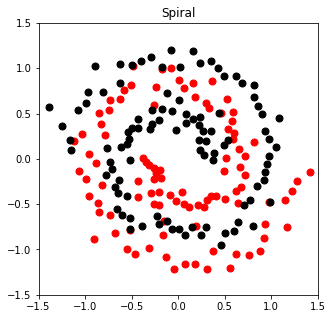

In [15]:
markersize_ = 7**2
plt.figure(figsize = (5,5))
plt.scatter(spiral_xr, spiral_yr, c = 'r', s=markersize_)
plt.scatter(spiral_xk, spiral_yk, c = 'k', s=markersize_)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title("Spiral");

In [30]:
X = spiral.col_names[0:2]
print(X)
print(type(X))

[u'x', u'y']
<type 'list'>


In [18]:
y = spiral.col_names[2]
dl_model = H2ODeepLearningEstimator(epochs=1000, )
dl_model.train(X, y, spiral)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [19]:
gbm_model = H2OGradientBoostingEstimator()
gbm_model.train(X, y, spiral)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [20]:
drf_model = H2ORandomForestEstimator()
drf_model.train(X, y, spiral)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [23]:
glm_model = H2OGeneralizedLinearEstimator(family="binomial")
glm_model.fit(spiral[X], spiral[y])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: 

	`fit` is not recommended outside of the sklearn framework. Use `train` instead.
  


glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1506545386805_212


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.23097408708
RMSE: 0.480597635325
LogLoss: 0.653747738037
Null degrees of freedom: 199
Residual degrees of freedom: 197
Null deviance: 277.258872224
Residual deviance: 261.499095215
AIC: 267.499095215
AUC: 0.6552
Gini: 0.3104
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.278896720355: 


,Black,Red,Error,Rate
Black,11.0,89.0,0.89,(89.0/100.0)
Red,0.0,100.0,0.0,(0.0/100.0)
Total,11.0,189.0,0.445,(89.0/200.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2788967,0.6920415,188.0
max f2,0.2788967,0.8488964,188.0
max f0point5,0.5101145,0.6659836,96.0
max accuracy,0.5101145,0.665,96.0
max precision,0.7588010,1.0,0.0
max recall,0.2788967,1.0,188.0
max specificity,0.7588010,1.0,0.0
max absolute_mcc,0.5101145,0.3301486,96.0
max min_per_class_accuracy,0.4995604,0.66,99.0
max mean_per_class_accuracy,0.5101145,0.665,96.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.7513066,2.0,2.0,1.0,1.0,0.02,0.02,100.0,100.0
,2,0.02,0.7466065,2.0,2.0,1.0,1.0,0.02,0.04,100.0,100.0
,3,0.03,0.7324228,2.0,2.0,1.0,1.0,0.02,0.06,100.0,100.0
,4,0.04,0.7237541,2.0,2.0,1.0,1.0,0.02,0.08,100.0,100.0
,5,0.05,0.7191567,2.0,2.0,1.0,1.0,0.02,0.1,100.0,100.0
,6,0.1,0.6817086,1.4,1.7,0.7,0.85,0.07,0.17,40.0,70.0
,7,0.15,0.6640298,0.4,1.2666667,0.2,0.6333333,0.02,0.19,-60.0,26.6666667
,8,0.2,0.6449746,0.8,1.15,0.4,0.575,0.04,0.23,-20.0,15.0
,9,0.3,0.5963479,1.4,1.2333333,0.7,0.6166667,0.14,0.37,40.0,23.3333333
,10,0.4,0.5503725,1.6,1.325,0.8,0.6625,0.16,0.53,60.0,32.5



Scoring History: 


,timestamp,duration,iteration,negative_log_likelihood,objective
,2017-09-27 21:38:30,0.000 sec,0,138.6294361,0.6931472
,2017-09-27 21:38:30,0.003 sec,1,130.7709163,0.6539560
,2017-09-27 21:38:30,0.004 sec,2,130.7495618,0.6538560
,2017-09-27 21:38:30,0.005 sec,3,130.7495476,0.6538560


In [24]:
models = [dl_model, gbm_model, drf_model, glm_model]
m_names = ["Deep Learning", "Gradient Boosted Method", "Distributed Random Forest", "Generalized Linear Model"]

In [25]:
def plot_spirals(models, model_names):
    fig, ax = plt.subplots(2,2, figsize=(12,12))
    for k, subplot in enumerate(ax.flatten()):
        subplot.scatter(spiral_xr, spiral_yr, c = 'r', s=markersize_)
        subplot.scatter(spiral_xk, spiral_yk, c = 'k', s=markersize_)
        subplot.axis([-1.5, 1.5, -1.5, 1.5])
        subplot.set_title(model_names[k])
        subplot.set_xlabel('x')
        subplot.set_ylabel('y')
        pred_z = models[k].predict(grid).as_data_frame(True)
        subplot.contour(grid_x, grid_y, (pred_z['predict'] == 'Black').astype(np.int).reshape(201,201), colors='b')

deeplearning prediction progress: |███████████████████████████████████████| 100%


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


gbm prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


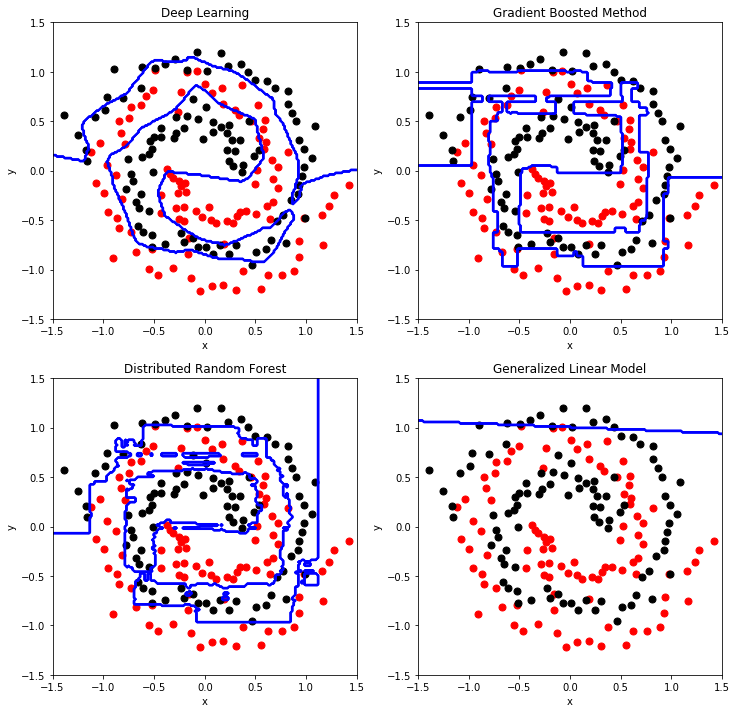

In [26]:
plot_spirals(models, m_names)

### 1974 Motor Trend US magazine dataset

In [36]:
mtcars = h2o.import_file(path = os.path.realpath("../data/mtcars.csv"))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [37]:
mtcars.head()

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1
Duster 360,14.3,8,360,245,3.21,3.57,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.19,20,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4


In [40]:
mtcars_filtered = mtcars[1:12]
mtcars_filtered.head()

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
21,6,160,110,3.9,2.62,16.46,0,1,4,4
21,6,160,110,3.9,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
18.1,6,225,105,2.76,3.46,20.22,1,0,3,1
14.3,8,360,245,3.21,3.57,15.84,0,0,3,4
24.4,4,146.7,62,3.69,3.19,20,1,0,4,2
22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4


In [41]:
model = H2OAutoEncoderEstimator(activation="Tanh", hidden=[50, 50, 50],
                                ignore_const_cols=False, epochs=100)

In [43]:
model.train(x=mtcars_filtered.col_names, training_frame=mtcars_filtered)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [46]:
model._model_json['output']

Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 6,261 weights/biases, 79.8 KB, 3,200 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,11,Input,0.0,,,,,,,,,
,2,50,Tanh,0.0,0.0,0.0,0.0326085,0.0117436,0.0,0.0027799,0.1899648,0.0034350,0.0180388
,3,50,Tanh,0.0,0.0,0.0,0.0696627,0.0308341,0.0,0.0042777,0.1403785,-0.0019408,0.0266095
,4,50,Tanh,0.0,0.0,0.0,0.0601408,0.0310974,0.0,-0.0064000,0.1367821,-0.0016912,0.0249806
,5,11,Tanh,,0.0,0.0,0.0286151,0.0123612,0.0,0.0081929,0.1643521,0.0111823,0.0243638


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2017-09-27 23:20:31,0.033 sec,0.00000 obs/sec,0.0,0,0.0,0.4082370,0.1666575
,2017-09-27 23:20:31,0.198 sec,19393 obs/sec,100.0,10,3200.0,0.0348218,0.0012126



ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.00121255960698
RMSE: 0.0348218265888


{u'__meta': {u'schema_name': u'DeepLearningModelOutputV3',
  u'schema_type': u'DeepLearningModelOutput',
  u'schema_version': 3},
 u'biases': None,
 u'catoffsets': None,
 u'cross_validation_fold_assignment_frame_id': None,
 u'cross_validation_holdout_predictions_frame_id': None,
 u'cross_validation_metrics': None,
 u'cross_validation_metrics_summary': None,
 u'cross_validation_models': None,
 u'cross_validation_predictions': None,
 u'domains': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 u'end_time': 1506554431784,
 u'help': {u'__meta': u'Metadata on this schema instance, to make it self-describing.',
  u'biases': u'Frame keys for bias vectors',
  u'catoffsets': u'Categorical offsets for one-hot encoding',
  u'cross_validation_fold_assignment_frame_id': u'Cross-validation fold assignment (each row is assigned to one holdout fold)',
  u'cross_validation_holdout_predictions_frame_id': u'Cross-validation holdout predictions (full out-of-sample p

In [54]:
errors = model.anomaly(mtcars_filtered)
errors.describe()

Rows:32
Cols:1




,Reconstruction.MSE
type,real
mins,3.58212755649e-05
mean,0.00121255960698
maxs,0.0045209675693
sigma,0.00104339526792
zeros,0
missing,0
0,5.44338776455e-05
1,9.93733842341e-05
2,0.000581063430137


   Reconstruction.MSE
0            0.000054
1            0.000099
2            0.000581
3            0.000774
4            0.001147


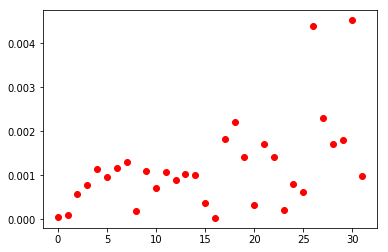

In [65]:
# plot
error_as_pandas_df = errors.as_data_frame(use_pandas = True)
print(error_as_pandas_df.head())
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(error_as_pandas_df, 'ro')

In [77]:
error_filtered = error_as_pandas_df[error_as_pandas_df['Reconstruction.MSE'] > 0.0025]

In [106]:
df.iloc[list(error_filtered.index.values)]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.14,16.7,0,1,5,2
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
